In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'gaussian_beam', 'stats_2')

In [3]:
gt = torch.load(os.path.join(dr, 'gaussian_beam.pt')).numpy_particles()

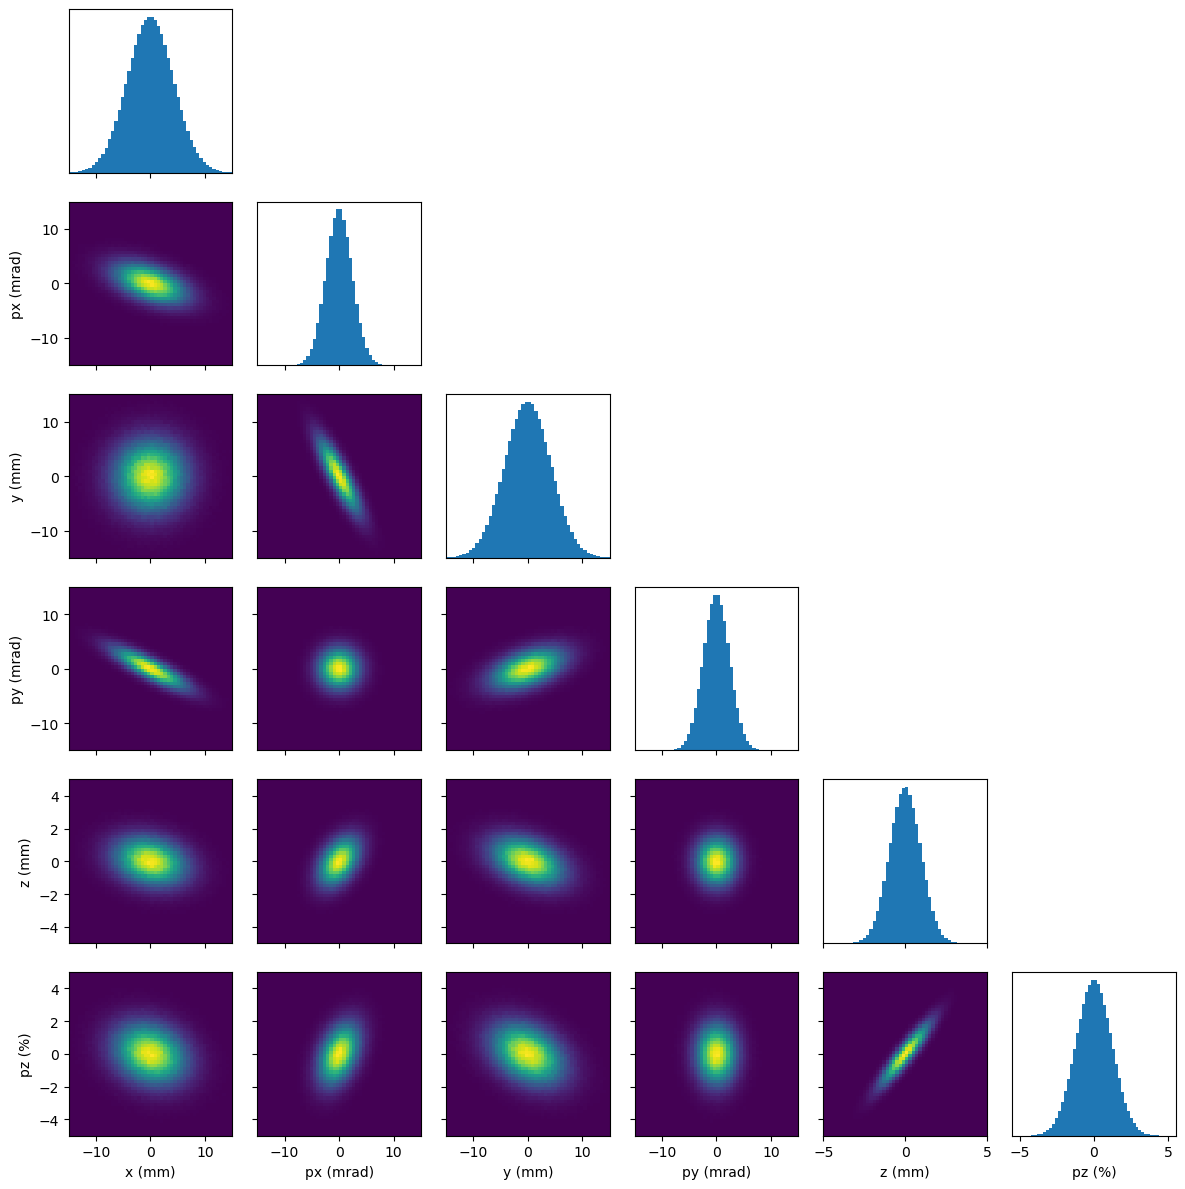

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-5e-3,5e-3],
    [-5e-2,5e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
n_beams = 10
n_par = 100_000

pars = read_all_particles(
    dr = dr,
    n_beams = n_beams, 
    n_par = n_par
)

In [6]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, n_par*n_beams))

In [7]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

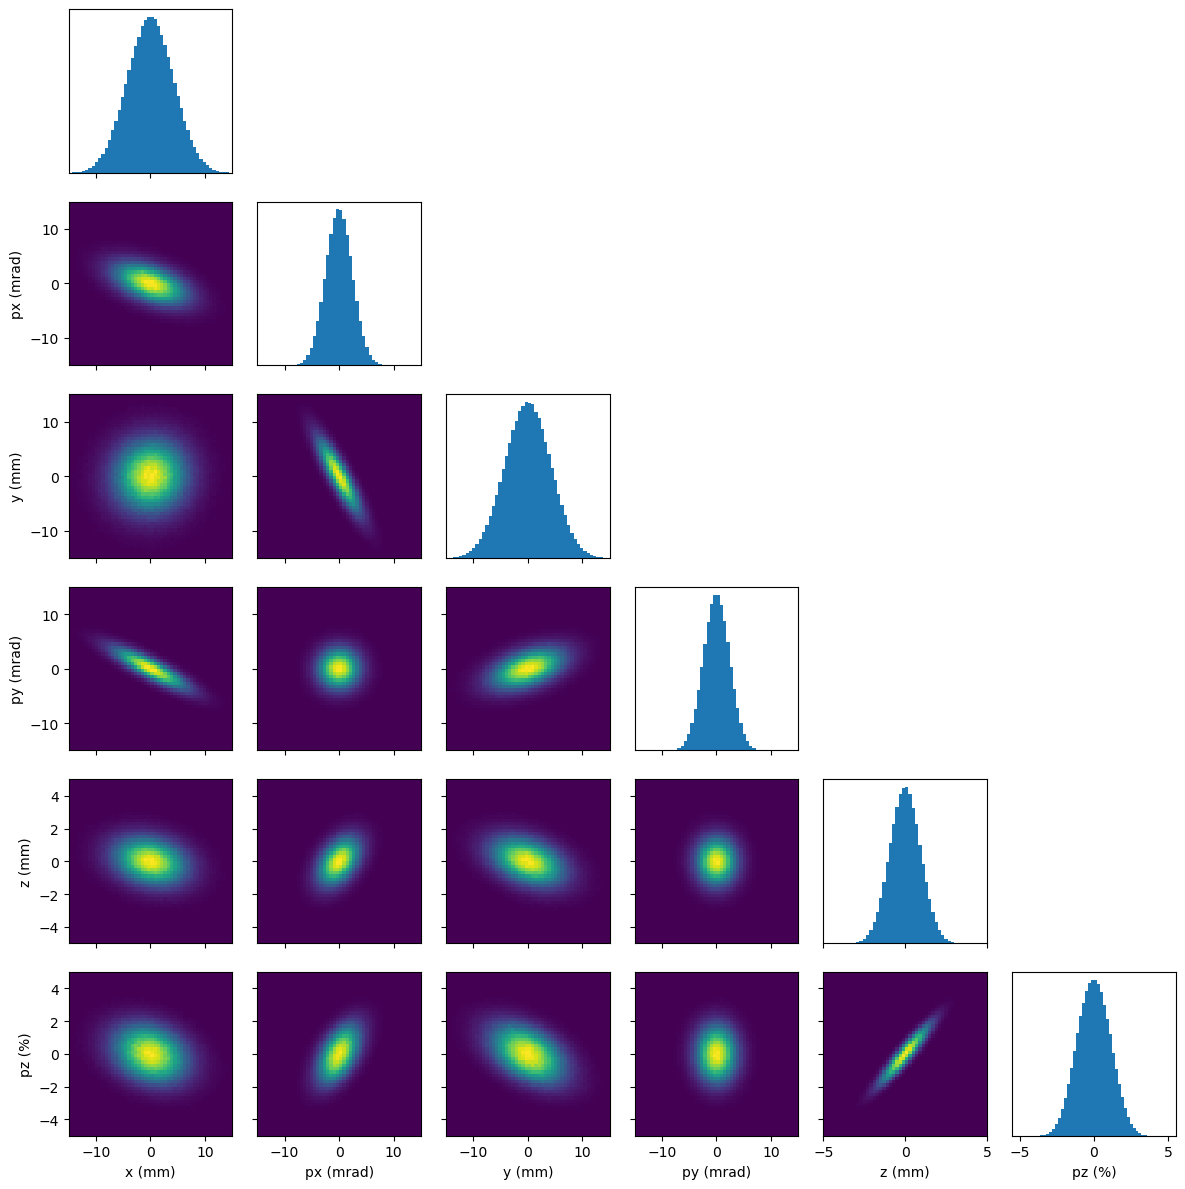

In [8]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

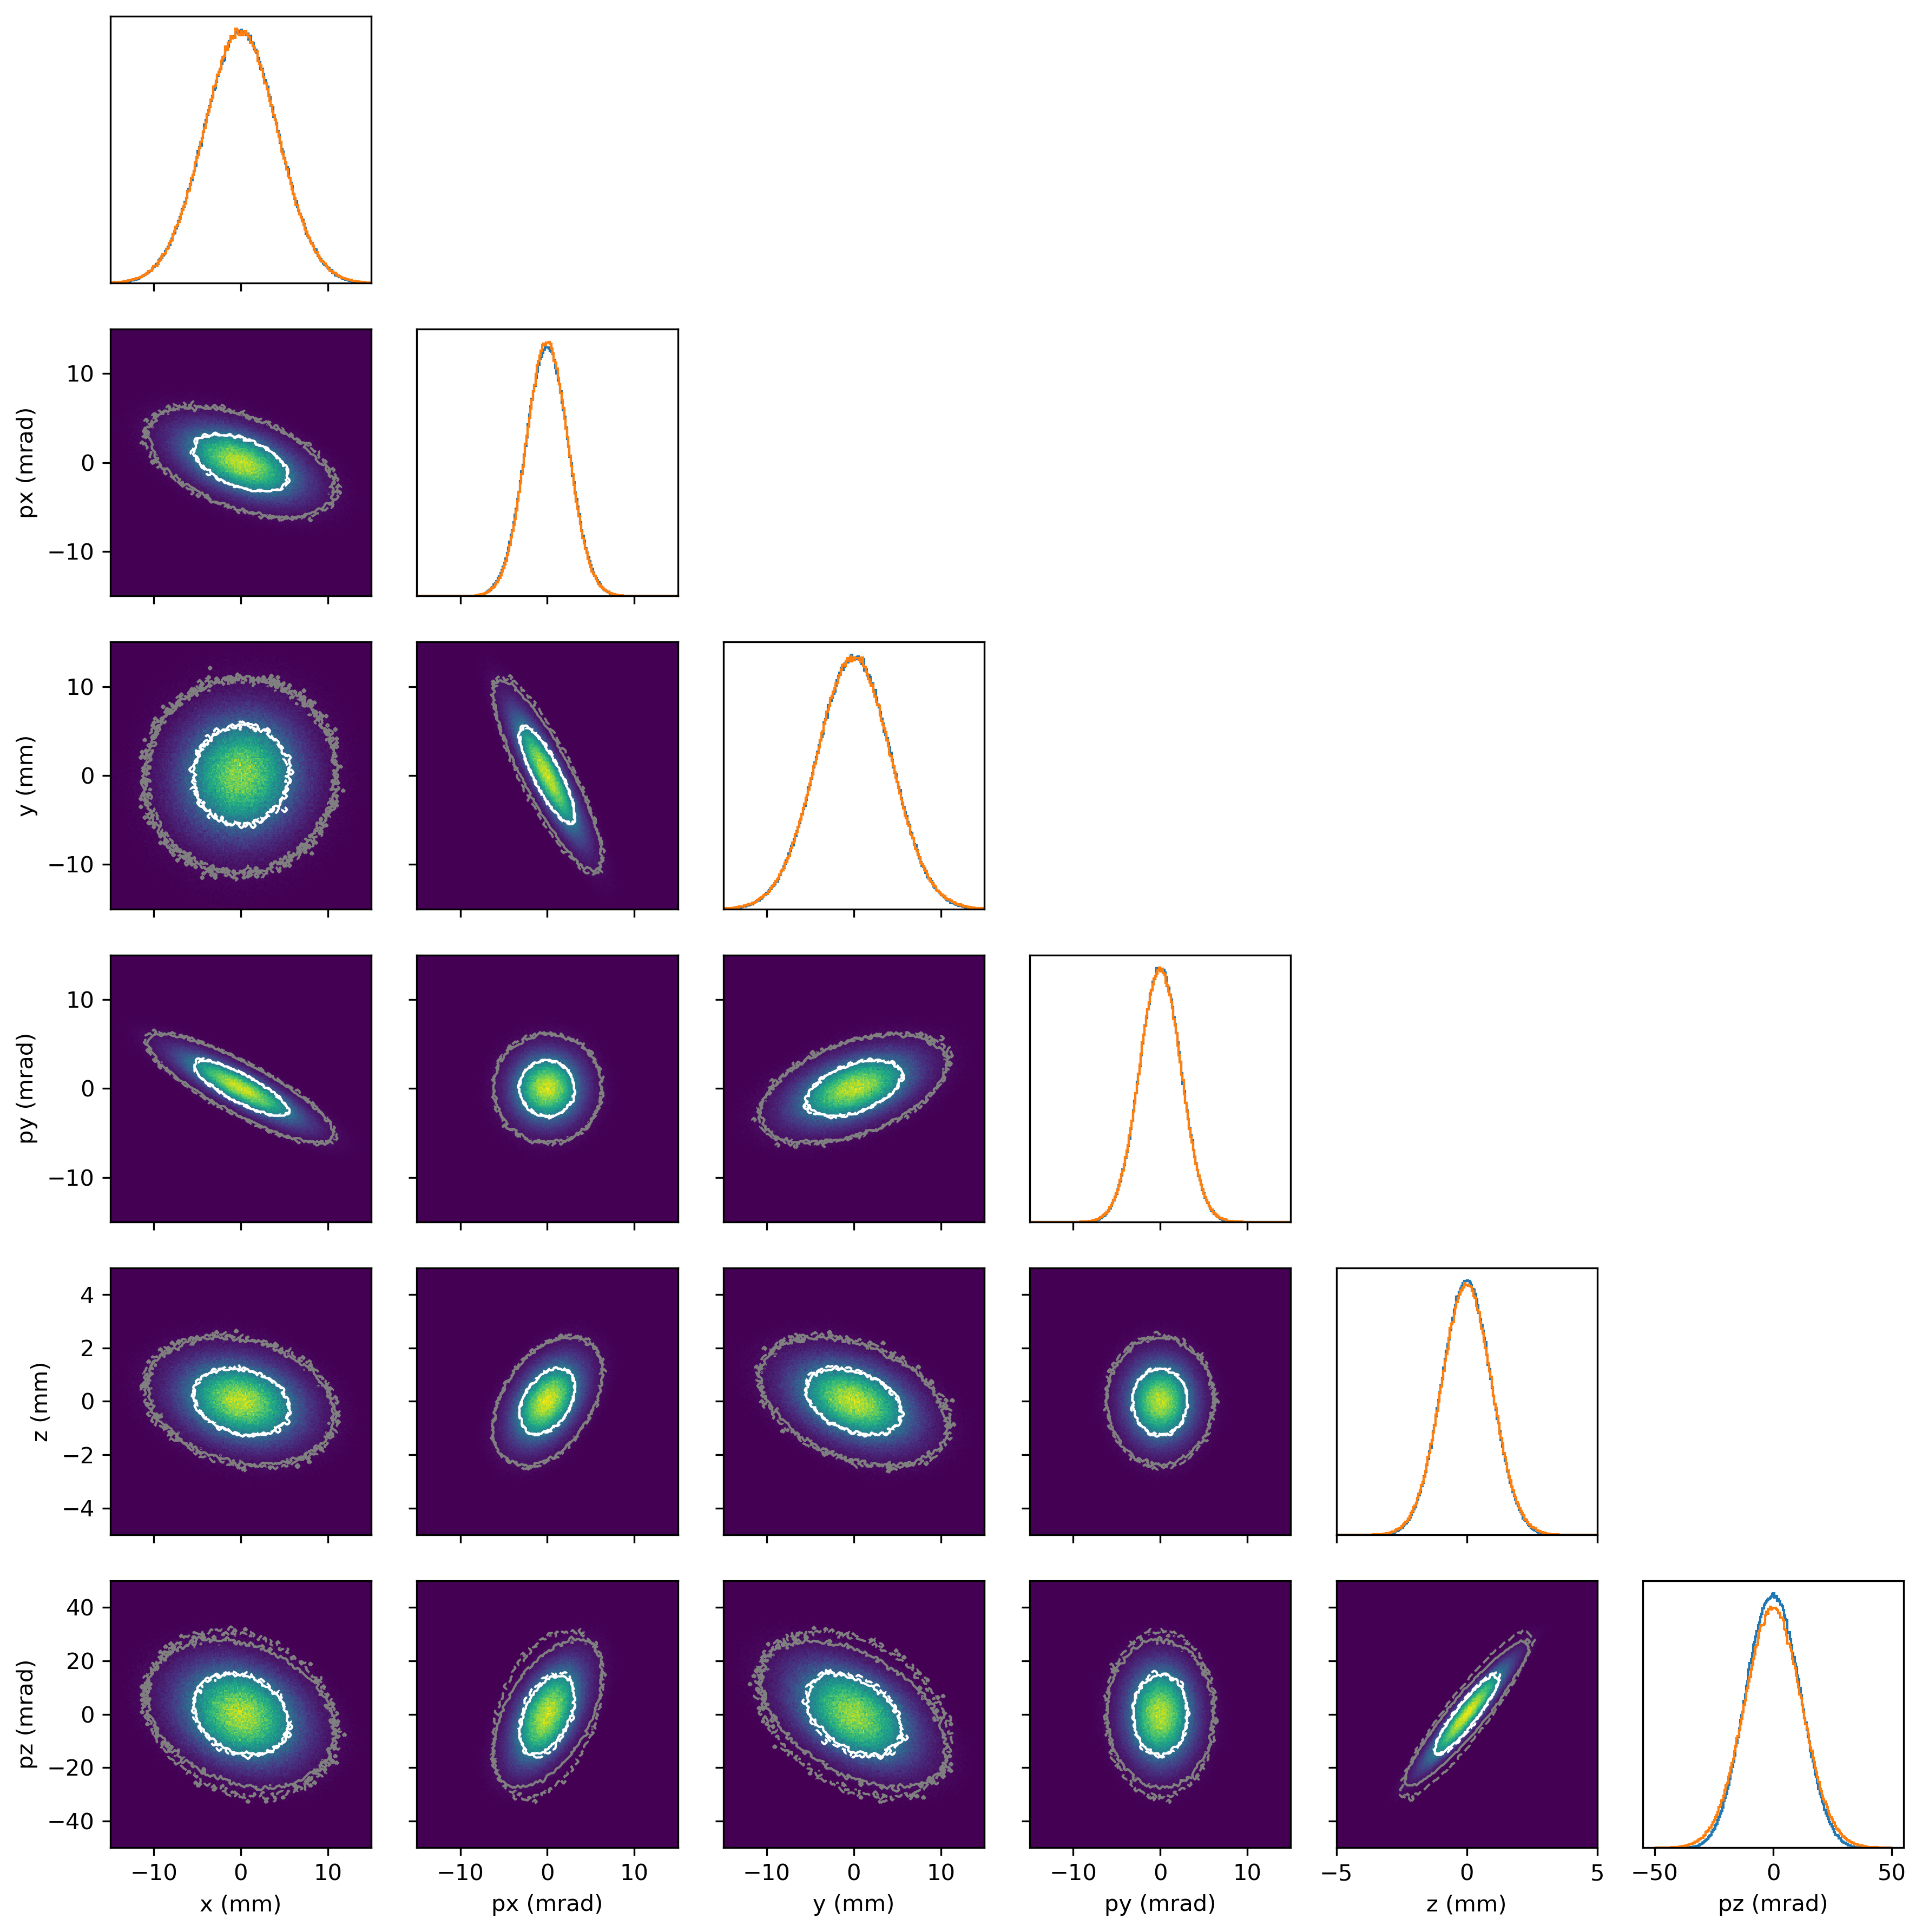

In [9]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

ground truth: 
[[ 1.01e+01 -2.79e+00 -1.62e-02 -4.85e+00 -4.89e-01 -5.65e+00]
 [-2.79e+00  3.23e+00 -4.85e+00 -4.42e-03  5.47e-01  6.31e+00]
 [-1.62e-02 -4.85e+00  1.01e+01  2.81e+00 -8.53e-01 -9.85e+00]
 [-4.85e+00 -4.42e-03  2.81e+00  3.24e+00 -1.56e-03 -1.73e-02]
 [-4.89e-01  5.47e-01 -8.53e-01 -1.56e-03  5.11e-01  5.89e+00]
 [-5.65e+00  6.31e+00 -9.85e+00 -1.73e-02  5.89e+00  7.98e+01]]

reconstruction avg: 
[[ 1.11e+01 -3.18e+00  2.63e-01 -5.44e+00 -5.06e-01 -6.49e+00]
 [-3.18e+00  3.63e+00 -5.50e+00  3.63e-02  6.06e-01  8.25e+00]
 [ 2.63e-01 -5.50e+00  1.10e+01  2.95e+00 -9.22e-01 -1.23e+01]
 [-5.44e+00  3.63e-02  2.95e+00  3.55e+00 -2.29e-02 -2.98e-01]
 [-5.06e-01  6.06e-01 -9.22e-01 -2.29e-02  5.43e-01  6.03e+00]
 [-6.49e+00  8.25e+00 -1.23e+01 -2.98e-01  6.03e+00  7.72e+01]]

reconstruction std: 
[[0.72 0.32 0.45 0.37 0.13 1.83]
 [0.32 0.26 0.37 0.14 0.07 1.26]
 [0.45 0.37 0.69 0.28 0.13 1.71]
 [0.37 0.14 0.28 0.21 0.07 0.72]
 [0.13 0.07 0.13 0.07 0.03 0.34]
 [1.83 1.26 1.71 0

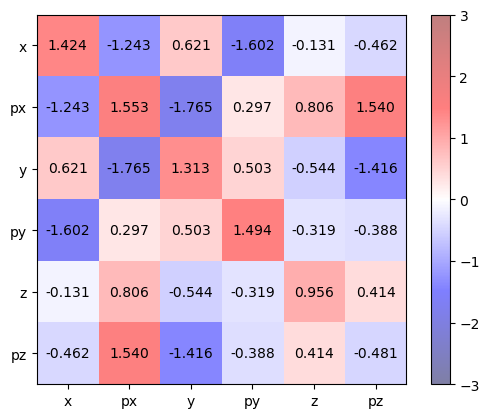

In [10]:
show_cov_stats(pars, gt, beam_fraction=0.5)

ground truth: 
[[ 1.65e+01 -4.60e+00  6.82e-03 -7.96e+00 -8.06e-01 -9.31e+00]
 [-4.60e+00  5.31e+00 -7.95e+00  3.93e-03  8.97e-01  1.03e+01]
 [ 6.82e-03 -7.95e+00  1.65e+01  4.58e+00 -1.40e+00 -1.61e+01]
 [-7.96e+00  3.93e-03  4.58e+00  5.31e+00 -7.37e-04  4.19e-03]
 [-8.06e-01  8.97e-01 -1.40e+00 -7.37e-04  8.39e-01  9.67e+00]
 [-9.31e+00  1.03e+01 -1.61e+01  4.19e-03  9.67e+00  1.31e+02]]

reconstruction avg: 
[[ 1.66e+01 -4.83e+00  5.47e-01 -8.08e+00 -8.04e-01 -1.04e+01]
 [-4.83e+00  5.54e+00 -8.36e+00  4.51e-02  9.18e-01  1.29e+01]
 [ 5.47e-01 -8.36e+00  1.65e+01  4.38e+00 -1.39e+00 -1.93e+01]
 [-8.08e+00  4.51e-02  4.38e+00  5.29e+00 -1.77e-02 -3.48e-01]
 [-8.04e-01  9.18e-01 -1.39e+00 -1.77e-02  8.14e-01  8.95e+00]
 [-1.04e+01  1.29e+01 -1.93e+01 -3.48e-01  8.95e+00  1.12e+02]]

reconstruction std: 
[[0.5  0.21 0.43 0.32 0.13 1.4 ]
 [0.21 0.19 0.31 0.13 0.07 1.04]
 [0.43 0.31 0.54 0.26 0.12 1.64]
 [0.32 0.13 0.26 0.22 0.07 0.66]
 [0.13 0.07 0.12 0.07 0.03 0.3 ]
 [1.4  1.04 1.64 0

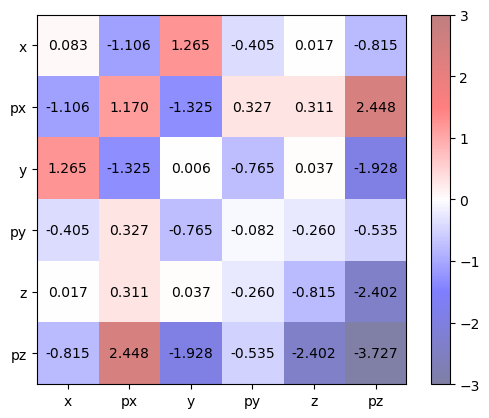

In [11]:
show_cov_stats(pars, gt, beam_fraction=0.95)

ground truth: 
[[ 18.01  -5.01   0.01  -8.67  -0.88 -10.13]
 [ -5.01   5.78  -8.66   0.01   0.98  11.25]
 [  0.01  -8.66  17.99   4.99  -1.52 -17.54]
 [ -8.67   0.01   4.99   5.78  -0.     0.  ]
 [ -0.88   0.98  -1.52  -0.     0.91  10.53]
 [-10.13  11.25 -17.54   0.    10.53 142.65]]

reconstruction avg: 
[[ 17.59  -5.12   0.58  -8.58  -0.87 -11.26]
 [ -5.12   5.88  -8.87   0.04   0.98  13.76]
 [  0.58  -8.87  17.52   4.65  -1.48 -20.56]
 [ -8.58   0.04   4.65   5.61  -0.01  -0.32]
 [ -0.87   0.98  -1.48  -0.01   0.86   9.47]
 [-11.26  13.76 -20.56  -0.32   9.47 118.39]]

reconstruction std: 
[[0.51 0.18 0.44 0.38 0.12 1.19]
 [0.18 0.13 0.2  0.12 0.06 0.81]
 [0.44 0.2  0.45 0.31 0.1  1.41]
 [0.38 0.12 0.31 0.28 0.07 0.67]
 [0.12 0.06 0.1  0.07 0.03 0.33]
 [1.19 0.81 1.41 0.67 0.33 6.09]]

reconstruction relative uncertainty: 
[[ 0.03 -0.03  0.75 -0.04 -0.14 -0.11]
 [-0.03  0.02 -0.02  2.79  0.06  0.06]
 [ 0.75 -0.02  0.03  0.07 -0.07 -0.07]
 [-0.04  2.79  0.07  0.05 -5.49 -2.08]
 [-0.

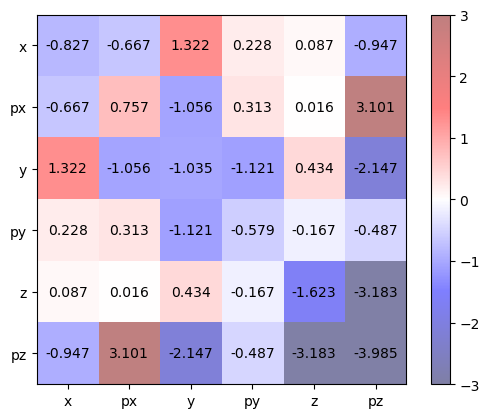

In [12]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)